In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Display plots in-notebook
%matplotlib inline

In [316]:
df = pd.read_csv('database.csv')

/home/daz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [317]:
df.shape

(38113, 81)

In [318]:
df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
Vehicle ID                             38113 non-null int64
Year                                   38113 non-null int64
Make                                   38113 non-null object
Model                                  38113 non-null object
Class                                  38113 non-null object
Drive                                  36924 non-null object
Transmission                           38102 non-null object
Transmission Descriptor                15045 non-null object
Engine Index                           38113 non-null int64
Engine Descriptor                      22693 non-null object
Engine Cylinders                       37977 non-null float64
Engine Displacement                    37979 non-null float64
Turbocharger                           5239 non-null object
Supercharger                           693 non-null object
Fuel Type                              38

In [174]:
#df = df.replace(0, np.nan)
#df.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001.0,(FFS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005.0,(FFS) CA model,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002.0,(FFS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006.0,(FFS) CA model,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830.0,(FFS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
df.isnull().sum()

Vehicle ID                               0
Year                                     0
Make                                     0
Model                                    0
Class                                    0
Drive                                 1189
Transmission                            11
Transmission Descriptor              23068
Engine Index                             0
Engine Descriptor                    15420
Engine Cylinders                       136
Engine Displacement                    134
Turbocharger                         32874
Supercharger                         37420
Fuel Type                                0
Fuel Type 1                              0
Fuel Type 2                          36675
City MPG (FT1)                           0
Unrounded City MPG (FT1)                 0
City MPG (FT2)                           0
Unrounded City MPG (FT2)                 0
City Gasoline Consumption (CD)           0
City Electricity Consumption             0
City Utilit

In [321]:
column_names = df.isnull().sum().sort_values(ascending = False).index
column_names
find_null_columns = df.isnull().sum().sort_values(ascending = False).values
for col in range(len(find_null_columns)):
    if find_null_columns[col] > (len(df)/100)*60:
        print (column_names[col])
        df.drop(column_names[col], axis=1, inplace=True)

Alternate Charger
Vehicle Charger
Electric Motor
Supercharger
Range (FT2)
Fuel Type 2
Gas Guzzler Tax
Alternative Fuel/Technology
Turbocharger
Start Stop Technology
Manufacturer Code
Transmission Descriptor


In [322]:
df.isnull().sum()

Vehicle ID                                 0
Year                                       0
Make                                       0
Model                                      0
Class                                      0
Drive                                   1189
Transmission                              11
Engine Index                               0
Engine Descriptor                      15420
Engine Cylinders                         136
Engine Displacement                      134
Fuel Type                                  0
Fuel Type 1                                0
City MPG (FT1)                             0
Unrounded City MPG (FT1)                   0
City MPG (FT2)                             0
Unrounded City MPG (FT2)                   0
City Gasoline Consumption (CD)             0
City Electricity Consumption               0
City Utility Factor                        0
Highway MPG (FT1)                          0
Unrounded Highway MPG (FT1)                0
Highway MP

In [323]:
df.dropna(inplace=True)

In [324]:
df.shape

(21531, 69)

In [325]:
df.isnull().sum().sum()

0

In [326]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns

Index(['Vehicle_ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Engine_Index', 'Engine_Descriptor', 'Engine_Cylinders',
       'Engine_Displacement', 'Fuel_Type', 'Fuel_Type_1', 'City_MPG_FT1',
       'Unrounded_City_MPG_FT1', 'City_MPG_FT2', 'Unrounded_City_MPG_FT2',
       'City_Gasoline_Consumption_CD', 'City_Electricity_Consumption',
       'City_Utility_Factor', 'Highway_MPG_FT1', 'Unrounded_Highway_MPG_FT1',
       'Highway_MPG_FT2', 'Unrounded_Highway_MPG_FT2',
       'Highway_Gasoline_Consumption_CD', 'Highway_Electricity_Consumption',
       'Highway_Utility_Factor', 'Unadjusted_City_MPG_FT1',
       'Unadjusted_Highway_MPG_FT1', 'Unadjusted_City_MPG_FT2',
       'Unadjusted_Highway_MPG_FT2', 'Combined_MPG_FT1',
       'Unrounded_Combined_MPG_FT1', 'Combined_MPG_FT2',
       'Unrounded_Combined_MPG_FT2', 'Combined_Electricity_Consumption',
       'Combined_Gasoline_Consumption_CD', 'Combined_Utility_Factor',
       'Annual_Fuel_Cost_FT1', 'Annual_Fuel_C

In [327]:
df.drop('Fuel_Economy_Score', axis=1, inplace=True)
df.drop('GHG_Score', axis=1, inplace=True)

In [328]:
df.head()

,Vehicle_ID,Year,Make,Model,Class,Drive,Transmission,Engine_Index,Engine_Descriptor,Engine_Cylinders,...,Hours_to_Charge_240V,Hours_to_Charge_AC_240V,Composite_City_MPG,Composite_Highway_MPG,Composite_Combined_MPG,Range_FT1,City_Range_FT1,Highway_Range_FT1,City_Range_FT2,Highway_Range_FT2
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1830,(FFS),4.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
5,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1880,(FFS) CA model,4.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
6,27549,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1831,(FFS),6.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
7,28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,1881,(FFS) CA model,6.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
8,27593,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,1524,(FFS),6.0,...,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0


In [329]:
show_datatype_object = df.select_dtypes(['bool'])
df.drop(show_datatype_object.columns, axis=1, inplace=True)
show_datatype_object = df.select_dtypes(['bool'])

In [330]:
show_datatype_object = df.select_dtypes(['object'])
show_datatype_object.columns

Index(['Make', 'Model', 'Class', 'Drive', 'Transmission', 'Engine_Descriptor',
       'Fuel_Type', 'Fuel_Type_1', 'My_MPG_Data'],
      dtype='object')

In [331]:
df['Fuel_Type'].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Premium or E85', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

In [332]:
fuel_type_dict = {}
fuel_types = df['Fuel_Type'].unique()
for index in range(len(fuel_types)):
    fuel_type_dict[fuel_types[index]] = index
df['Fuel_Type_Num'] = df.Fuel_Type.map(fuel_type_dict)
df['Fuel_Type_Num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [333]:
fuel_type_1_dict = {}
fuel_types_1 = df['Fuel_Type_1'].unique()
for index in range(len(fuel_types_1)):
    fuel_type_1_dict[fuel_types_1[index]] = index
df['Fuel_Type_1_Num'] = df.Fuel_Type_1.map(fuel_type_1_dict)
df['Fuel_Type_1_Num'].unique()

array([0, 1, 2, 3])

In [334]:
df['My_MPG_Data'].unique()

array(['N', 'Y'], dtype=object)

In [302]:
My_MPG_Data_dict = {}
My_MPG_Data_unique = df['My_MPG_Data'].unique()
for index in range(len(My_MPG_Data_unique)):
    My_MPG_Data_dict[My_MPG_Data_unique[index]] = index
df['My_MPG_Data_Num'] = df.My_MPG_Data.map(My_MPG_Data_dict)
df['My_MPG_Data_Num'].unique()

array([0, 1])

In [335]:
int_data_types = df.select_dtypes(['int64']).columns
int_data_types
for index in int_data_types:
    df[index] = df[index].astype(float)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21531 entries, 4 to 38112
Data columns (total 68 columns):
Vehicle_ID                           21531 non-null float64
Year                                 21531 non-null float64
Make                                 21531 non-null object
Model                                21531 non-null object
Class                                21531 non-null object
Drive                                21531 non-null object
Transmission                         21531 non-null object
Engine_Index                         21531 non-null float64
Engine_Descriptor                    21531 non-null object
Engine_Cylinders                     21531 non-null float64
Engine_Displacement                  21531 non-null float64
Fuel_Type                            21531 non-null object
Fuel_Type_1                          21531 non-null object
City_MPG_FT1                         21531 non-null float64
Unrounded_City_MPG_FT1               21531 non-null float64

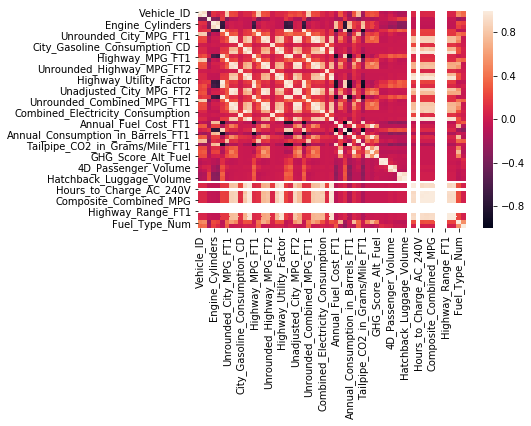

In [366]:
sns.heatmap(df.corr())

In [ ]:
sns.pairplot(df)

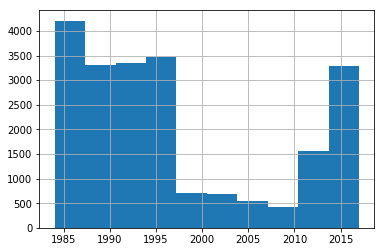

In [337]:
df.Year.hist()

In [338]:
df.corr()['Year'].sort_values(ascending=False)

Year                                 1.000000
Vehicle_ID                           0.910474
Unrounded_Highway_MPG_FT1            0.851654
Unrounded_Combined_MPG_FT1           0.846998
Unrounded_City_MPG_FT1               0.841566
Tailpipe_CO2_FT1                     0.764510
Fuel_Type_Num                        0.518751
Fuel_Type_1_Num                      0.386513
Annual_Consumption_in_Barrels_FT2    0.317055
Annual_Fuel_Cost_FT2                 0.310862
Tailpipe_CO2_in_Grams/Mile_FT2       0.309250
Highway_MPG_FT2                      0.278087
Unadjusted_Highway_MPG_FT1           0.274939
Unadjusted_Highway_MPG_FT2           0.274875
Highway_MPG_FT1                      0.262681
Combined_MPG_FT2                     0.255894
Unrounded_Highway_MPG_FT2            0.249877
GHG_Score_Alt_Fuel                   0.247239
Tailpipe_CO2_FT2                     0.246452
City_MPG_FT2                         0.237306
Unrounded_Combined_MPG_FT2           0.228081
Unadjusted_City_MPG_FT2           

/home/daz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


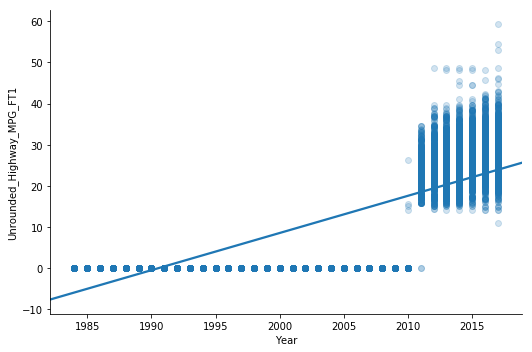

In [339]:
sns.lmplot(x='Year', y='Unrounded_Highway_MPG_FT1', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

In [340]:
results = df.corr()
top_result = 0
top_feature = ""
for line in results:
    if 'MPG' in line:
        if results[line].sort_values(ascending=False)[1] > top_result:
            top_result = results[line].sort_values(ascending=False)[1]
            top_feature = line
print (top_feature, top_result)
print (df.corr()[top_feature].sort_values(ascending=False))

Unrounded_City_MPG_FT1 0.9989634977289886
Unrounded_City_MPG_FT1               1.000000
Unrounded_Combined_MPG_FT1           0.998963
Unrounded_Highway_MPG_FT1            0.994001
Year                                 0.841566
Vehicle_ID                           0.813379
Tailpipe_CO2_FT1                     0.775907
Fuel_Type_Num                        0.399194
Unadjusted_Highway_MPG_FT1           0.397845
Highway_MPG_FT1                      0.378972
Combined_MPG_FT1                     0.342873
Unrounded_Highway_MPG_FT2            0.331501
Fuel_Type_1_Num                      0.331366
Unrounded_Combined_MPG_FT2           0.317169
Unadjusted_City_MPG_FT1              0.316941
City_MPG_FT1                         0.311878
Unrounded_City_MPG_FT2               0.304481
Unadjusted_Highway_MPG_FT2           0.285039
Highway_MPG_FT2                      0.281108
Combined_MPG_FT2                     0.275748
City_MPG_FT2                         0.269072
Unadjusted_City_MPG_FT2              0

/home/daz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


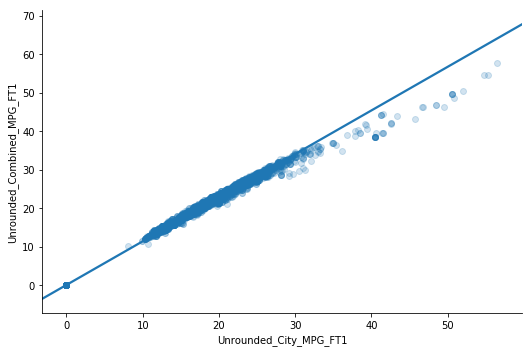

In [341]:
sns.lmplot(x='Unrounded_City_MPG_FT1', y='Unrounded_Combined_MPG_FT1', data=df, aspect=1.5, scatter_kws={'alpha':0.2})

In [359]:
test_frame = df
y = df['Year']
feature_cols = df.describe().columns.drop('Year').values
test_frame.drop('Year', axis=1)
X = df[feature_cols]

In [360]:
rfreg = RandomForestRegressor(n_estimators=500, max_features=1, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [361]:
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
0,Vehicle_ID,0.163081
1,Engine_Index,0.130160
23,Unrounded_Combined_MPG_FT1,0.102706
12,Unrounded_Highway_MPG_FT1,0.094130
5,Unrounded_City_MPG_FT1,0.090607
34,Tailpipe_CO2_FT1,0.084536
56,Fuel_Type_Num,0.036106
57,Fuel_Type_1_Num,0.025411
3,Engine_Displacement,0.023546
19,Unadjusted_Highway_MPG_FT1,0.021795


In [362]:
lr = LinearRegression()
feature_cols = ['Year']
X = df[feature_cols]
y = df.Unrounded_Combined_MPG_FT1

In [363]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [364]:
lr.predict([[2019]])

array([21.18773913])

/home/daz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


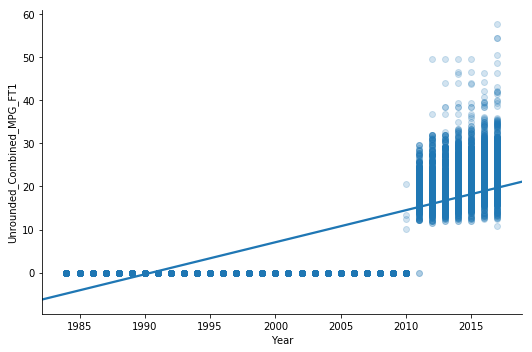

In [365]:
sns.lmplot(x='Year', y='Unrounded_Combined_MPG_FT1', data=df, aspect=1.5, scatter_kws={'alpha':0.2})Unrounded_Highway_MPG_FT1